In [1]:
import pandas as pd
import numpy as np
import sys, os

from scipy.interpolate import CubicSpline, CubicHermiteSpline

import matplotlib.pyplot as plt

In [2]:
rates = pd.read_csv("data/rates.csv")
rates.head()

,date_current,_1_month,_2_months,_3_months,_6_months,_1_year,_2_years,_3_years,_5_years,_7_years,_10_years,_20_years,_30_years
0,2019-11-01,1.58,1.58,1.52,1.55,1.53,1.56,1.55,1.55,1.63,1.73,2.03,2.21
1,2019-11-04,1.58,1.57,1.53,1.57,1.56,1.60,1.59,1.60,1.69,1.79,2.10,2.27
2,2019-11-05,1.56,1.57,1.56,1.58,1.62,1.63,1.63,1.66,1.77,1.86,2.17,2.34
3,2019-11-06,1.55,1.56,1.56,1.57,1.58,1.61,1.60,1.63,1.73,1.81,2.13,2.30
4,2019-11-07,1.57,1.57,1.56,1.58,1.58,1.68,1.70,1.74,1.84,1.92,2.24,2.40


In [3]:
mats = [
    21,
    42,
    63,
    126,
    252,
    504,
    756,
    252 * 5,
    252 * 7,
    252 * 10,
    252 * 20,
    252 * 30,
]

In [4]:
y = rates.iloc[0, 1:].values
y

array([1.58, 1.58, 1.52, 1.55, 1.53, 1.56, 1.55, 1.55, 1.63, 1.73, 2.03,
       2.21], dtype=object)

In [12]:
cs = CubicSpline(mats, y)

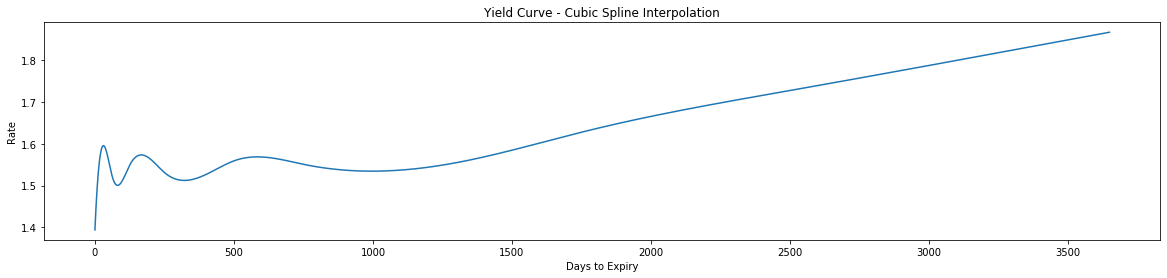

In [13]:
x = np.arange(0, 3650, 1)
plt.figure(figsize=(20, 4))
plt.title("Yield Curve - Cubic Spline Interpolation")
plt.xlabel("Days to Expiry")
plt.ylabel("Rate")
plt.plot(x, cs(x))
plt.savefig("plots/yield_curve_linear_cubic.png")
plt.show()

In [14]:
ratemap = pd.read_csv("data/ratemap.csv")

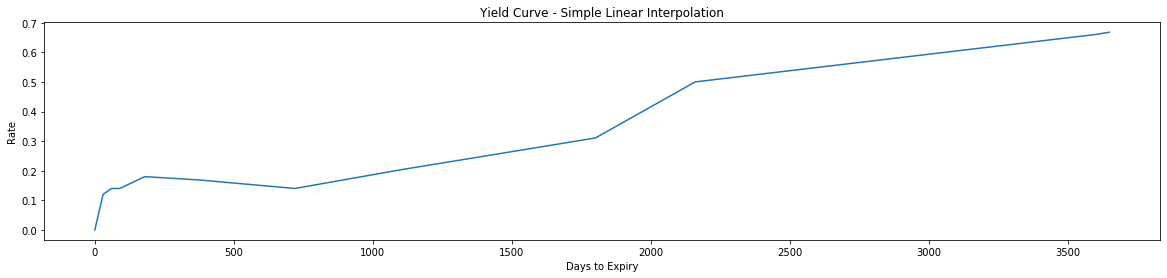

In [15]:
plt.figure(figsize=(20, 4))
plt.title("Yield Curve - Simple Linear Interpolation")
plt.xlabel("Days to Expiry")
plt.ylabel("Rate")
plt.plot(ratemap.days_to_expiry.values, ratemap.rate.values)
plt.savefig("plots/yield_curve_linear_interp.png")
plt.show()

### Yield Curve Per Day

In [18]:
x = np.arange(0, 3651, 1)
mats = [
    0,
    21,
    42,
    63,
    126,
    252,
    504,
    756,
    252 * 5,
    252 * 7,
    252 * 10,
    252 * 20,
    252 * 30,
]

def yield_curve(y):
    
    dc = y.values[0][0]
    y = [0] + y.values[0][1:].tolist()
    
    cs = CubicSpline(mats, y, bc_type="clamped")
    
    df = pd.DataFrame()
    df['tdays_to_expiry'] = x
    df['rate'] = cs(x)
    df['date_current'] = dc
    
    return df

ratemap = rates.groupby("date_current", axis=0, as_index=False)
ratemap = ratemap.apply(yield_curve).reset_index(drop=True)

In [19]:
ratemap.to_csv("data/cubic_ratemap.csv", index=False)